# Лабораторная №1

1. Реалезуйте градиентный спуск с постоянным шагом (learning rate). Иследовать сходимость при различных значениях шага.
2. Подберите, функциию изменения шага (learning rate scheduling), чтобы улучшить сходимость. Например экспоненциальную или ступенчатую.
3. Реализовать какой-нибудь метод одномерного поиска (дихотомия, метод Фибоначчи, метод золотого сечения) и градиентный спуек на его основе. Сравнить эфективноть с точки зрения количества вычислений минимичируемой функции и ее градиентов.
4. \* Сделать одновременый поиск с учетом усдовий Вольфа и исстедовать эффективность.
5. Проанализируйте раекторию градиентного спуска для нескольких квадратичных функций: придумайте 2-3 квадратичные функции, на которых работа метода будет отличаться, нарискйте графики с линиями уровня функций и траекториями методов. <br/>Попробуйте ответить на следуюший вопрос: Как отличаются поведения метода в зависимости от числа обусловленности функции, выбора начальной точки и стратегии выбора шага?
6. Иследуйте, как зависит число итераций, необходимых градиетному спуску для сходимости, от следующх дву параметров:

    * числа обусловленности k ≤ 1 оптимизированной функции,
    * размероности пространства n оптимизированных переменных.

   Для этого для заданых парметров n и k сгенерируйте случайным образом квадратичную задачу размера n с числом обусловаленности k и запустите на ней градиентный спуск с некоторой фиксированной требуемой точностью. Замерьте число итераций T(n,k), которое потребовалось сделать методу до сходимости (успешному выходу по критерию становки).

## Configuration

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
import yaml

In [10]:
config = yaml.load(
    stream=open('config.yaml'),
    Loader=yaml.FullLoader,
)

In [11]:
seed = int(config['seed'])
np.random.seed(seed)

In [12]:
_x = sy.Symbol('x')
_y = sy.Symbol('y')
_z = sy.Symbol('z')

## 0. Target function

In [13]:
def plot_func_1d(func, xs, *args, **kwargs):
    plt.plot(
        xs,
        func(xs),
        *args,
        **kwargs
    )

def plot_func_2d(func, xs, ys, *args, **kwargs):
    mxs, mys = np.meshgrid(xs, ys)
    plt.contourf(
        mxs,
        mys,
        func(xs, ys),
        *args,
        **kwargs
    )

In [14]:
_tg_func_1d = _x ** 2
_tg_func_1d

x**2

In [15]:
_tg_func_1d_diff = _tg_func_1d.diff(_x)
_tg_func_1d_diff

2*x

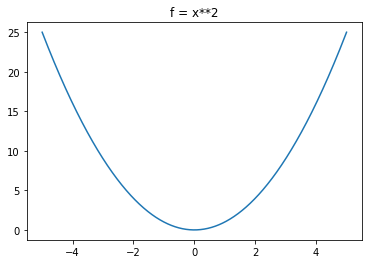

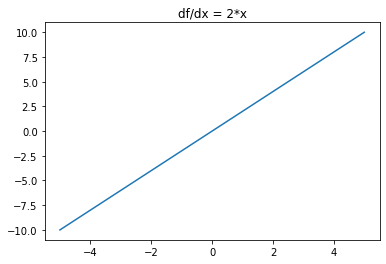

In [16]:
tg_func = sy.lambdify(_x, _tg_func_1d)
tg_func_diff = sy.lambdify(_x, _tg_func_1d_diff)

plt.title(f'f = {_tg_func_1d}')
plot_func_1d(tg_func, np.linspace(-5, 5, 1000))
plt.show()

plt.title(f'df/dx = {_tg_func_1d_diff}')
plot_func_1d(tg_func_diff, np.linspace(-5, 5, 1000))
plt.show()